# Backbone Networks

The main driving force that boosted research on deep learning was the AlexNet architecture published in 2012 NeurIPS paper. Many still valid ideas were presented in that paper, and this kind of networks trained for semantic classification tasks and multipurpose tools for computer vision and audio analysis.

<div>
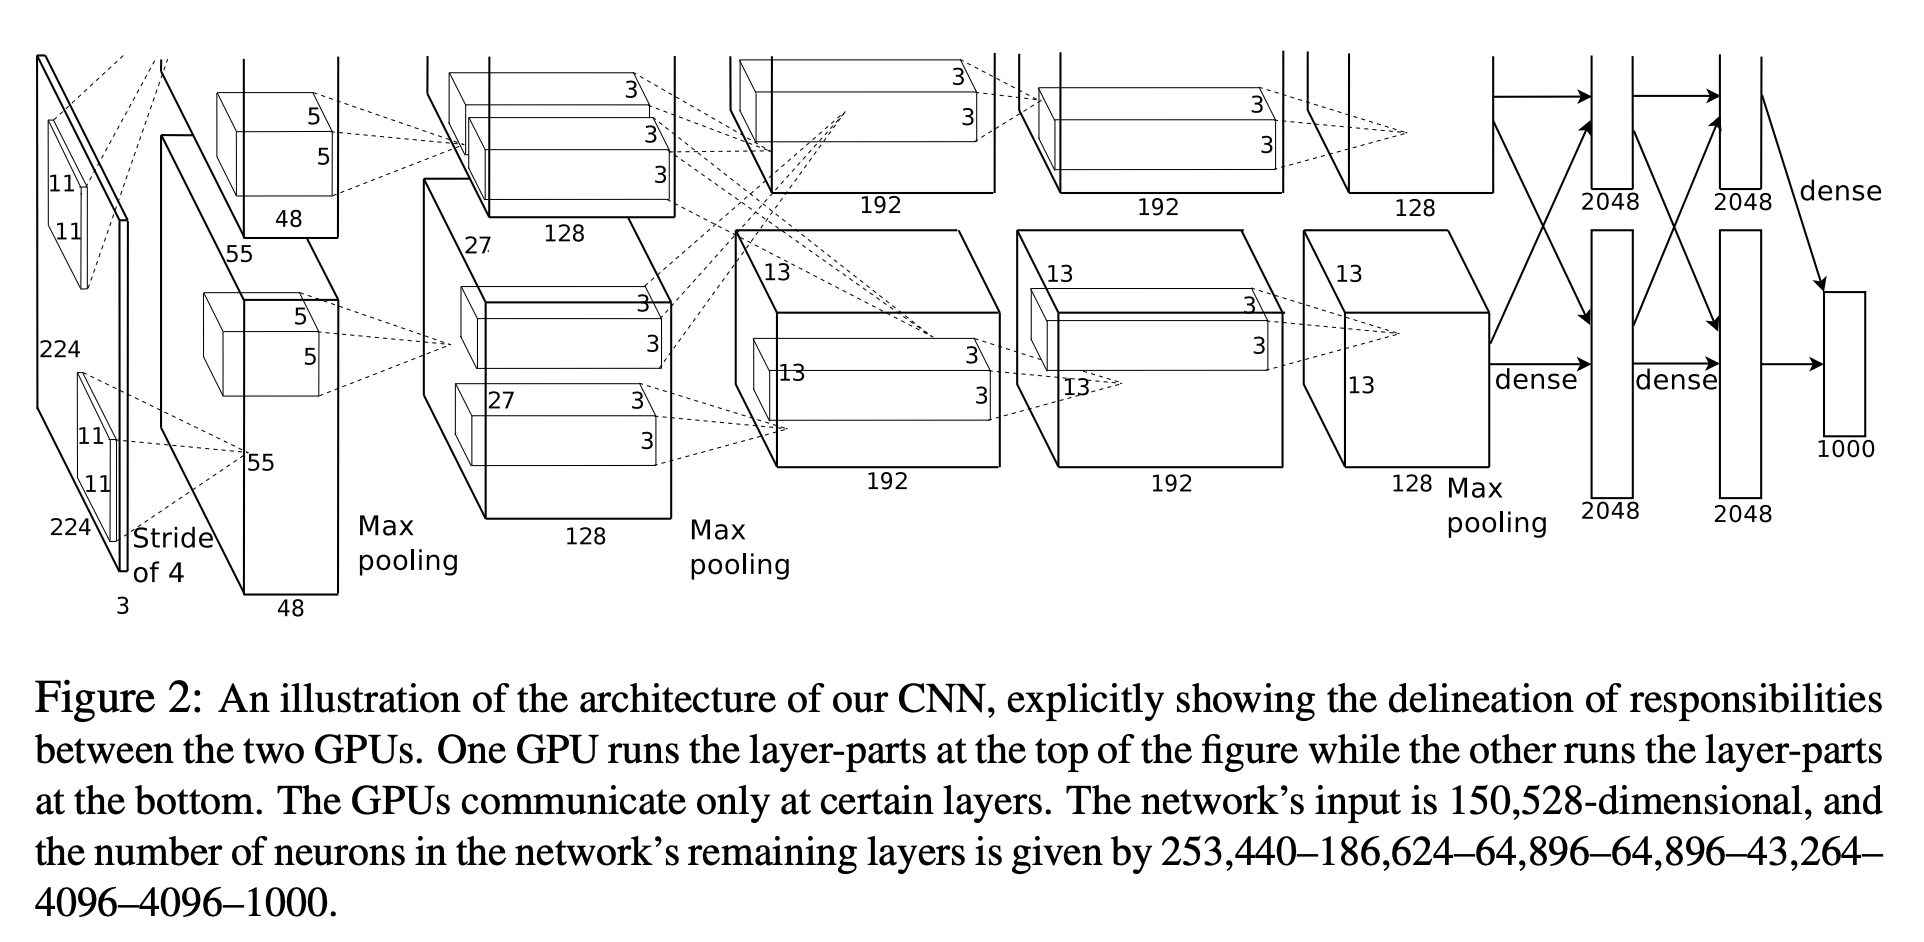
</div>

Let's download the VGG16 architecture and it's pre-trained weights. Note that the "16" comes from the number of convolution and full-connected layers.

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

Let's download one test image and display it. During loading it is converted to the size expected by the architecture input layer.

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = './golden_retriever.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

Next we convert image to format suitable for TensorFlow.

In [ ]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fourth dimension, for number of images
x = np.expand_dims(x, axis=0)

Then we do the following:
 * Pre-process the test image (zero mean etc.) to make it correspond the training data
 * Ask the output probabilities of 1000 ImageNet classes
 * Decode outputs to the first best

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

Finally, let's print the outputs.

In [ ]:
print(p)

## References

 * Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton (2012): "ImageNet Classification with Deep Convolutional Neural Networks", in NeurIPS Proceedings. URL: https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html
 * Code example adapted from https://towardsdatascience.com/how-to-use-a-pre-trained-model-vgg-for-image-classification-8dd7c4a4a517